**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

**Loading the Dataset**

In [ ]:
bank_dataset=pd.read_csv(r'/content/bank.csv')

In [ ]:
bank_dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Data Exploration**

In [ ]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Data Cleaning and Preprocessing**

In [ ]:
missing_values=bank_dataset.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
inconsistent_data=bank_dataset.nunique()
inconsistent_data

,0
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


In [ ]:
bank_dataset.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
duplicates=bank_dataset.duplicated()
bank_dataset[duplicates]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


**Exploratory Data Analysis (EDA)**

In [ ]:
round(bank_dataset.describe(),3)

,age,balance,day,duration,campaign,pdays,previous
count,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000,11162.000
mean,41.232,1528.539,15.658,371.994,2.508,51.330,0.833
std,11.913,3225.413,8.421,347.128,2.722,108.758,2.292
min,18.000,-6847.000,1.000,2.000,1.000,-1.000,0.000
25%,32.000,122.000,8.000,138.000,1.000,-1.000,0.000
50%,39.000,550.000,15.000,255.000,2.000,-1.000,0.000
75%,49.000,1708.000,22.000,496.000,3.000,20.750,1.000
max,95.000,81204.000,31.000,3881.000,63.000,854.000,58.000


**Handling Outliers**

In [ ]:
bank_dataset=bank_dataset[bank_dataset['balance']!=	81204.000]
bank_dataset=bank_dataset[bank_dataset['duration']!=	3881.000]
bank_dataset=bank_dataset[bank_dataset['campaign']!=	63.000]
bank_dataset=bank_dataset[bank_dataset['pdays']!=	854.000]
bank_dataset=bank_dataset[bank_dataset['previous']!=	58.000]


In [ ]:
round(bank_dataset.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,11156.00,11156.00,11156.00,11156.00,11156.00,11156.00,11156.00
mean,41.22,1513.73,15.66,371.66,2.50,51.21,0.83
std,11.90,3043.90,8.42,345.60,2.66,108.45,2.23
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1707.25,22.00,496.00,3.00,17.00,1.00
max,95.00,66653.00,31.00,3284.00,43.00,842.00,55.00


**Encoding Categorical Variables**

In [ ]:
encoder=LabelEncoder()
binary_columns = ['default', 'housing', 'loan', 'deposit']
for col in binary_columns:
  bank_dataset[col]=encoder.fit_transform(bank_dataset[col])

In [ ]:
mapping_job={'unknown':0,'admin.':1,'technician':2,'services':3,'management':4,'retired':5,'blue-collar':6,'self-employed':7,
         'employed':8,'entrepreneur':9,'housemaid':10,'unemployed':11,'student':12}
bank_dataset['job'] = bank_dataset['job'].replace(mapping_job)

mapping_marital={'single':1,'married':2,'divorced':3}
bank_dataset['marital'] = bank_dataset['marital'].replace(mapping_marital)

mapping_education={'primary':1,'secondary':2,'tertiary':3,'unknown':4}
bank_dataset['education'] = bank_dataset['education'].replace(mapping_education)

mapping_contact={'cellular':1,'telephone':2,'unknown':3}
bank_dataset['contact'] = bank_dataset['contact'].replace(mapping_contact)

mapping_month={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
               'sep':9,'oct':10,'nov':11,'dec':12}
bank_dataset['month'] = bank_dataset['month'].replace(mapping_month)

mapping_poutcome={'success':1,'failure':2,'unknown':0,'other':3}
bank_dataset['poutcome'] = bank_dataset['poutcome'].replace(mapping_poutcome)

bank_dataset.head()




<ipython-input-86-64e36d705e7f>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_dataset['poutcome'] = bank_dataset['poutcome'].replace(mapping_poutcome)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.493815,1,2,2,0,0.272449,1,0,3,-1.265798,5,1.939692,-0.564842,-0.481462,-0.371343,3,1
1,1.241732,1,2,2,0,-0.482539,0,0,3,-1.265798,5,3.169475,-0.564842,-0.481462,-0.371343,3,1
2,-0.018679,2,2,2,0,-0.080076,1,0,3,-1.265798,5,2.943774,-0.564842,-0.481462,-0.371343,3,1
3,1.157705,3,2,2,0,0.316145,1,0,3,-1.265798,5,0.599952,-0.564842,-0.481462,-0.371343,3,1
4,1.073677,1,2,3,0,-0.436872,0,0,3,-1.265798,5,0.871951,-0.189134,-0.481462,-0.371343,3,1


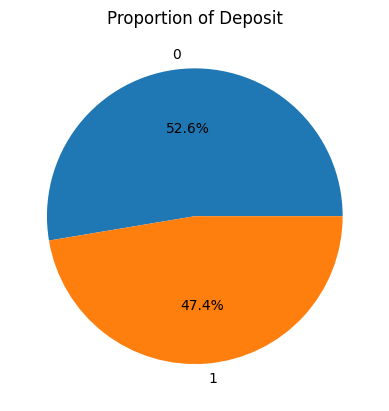

In [ ]:
deposit_counts = bank_dataset['deposit'].value_counts()
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Deposit')
plt.show()

**Data Scaling and Standardization**

In [ ]:
# Separate features and target
X = bank_dataset.drop('deposit', axis=1)  # Features (all columns except 'deposit')
y = bank_dataset['deposit']  # Target (the 'deposit' column)


In [ ]:

from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Select the features to scale (numerical columns)
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Apply the scaler to the numerical columns
bank_dataset[numerical_columns] = scaler.fit_transform(bank_dataset[numerical_columns])
print(bank_dataset.head())


        age  job  marital  education  default   balance  housing  loan  \
0  1.493815    1        2          2        0  0.272449        1     0   
1  1.241732    1        2          2        0 -0.482539        0     0   
2 -0.018679    2        2          2        0 -0.080076        1     0   
3  1.157705    3        2          2        0  0.316145        1     0   
4  1.073677    1        2          3        0 -0.436872        0     0   

   contact       day  month  duration  campaign     pdays  previous  poutcome  \
0        3 -1.265798      5  1.939692 -0.564842 -0.481462 -0.371343         3   
1        3 -1.265798      5  3.169475 -0.564842 -0.481462 -0.371343         3   
2        3 -1.265798      5  2.943774 -0.564842 -0.481462 -0.371343         3   
3        3 -1.265798      5  0.599952 -0.564842 -0.481462 -0.371343         3   
4        3 -1.265798      5  0.871951 -0.189134 -0.481462 -0.371343         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4  

**Splitting Data into Training and Testing Sets**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (8924, 16)
Testing data shape: (2232, 16)


**Model Training: Decision Tree Classifier and Model Evaluation and Prediction**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:',{accuracy})
conf_matrix=confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: {0.7939068100358423}
Confusion Matrix:
[[949 205]
 [255 823]]


**Visualization of Confusion Matrix**

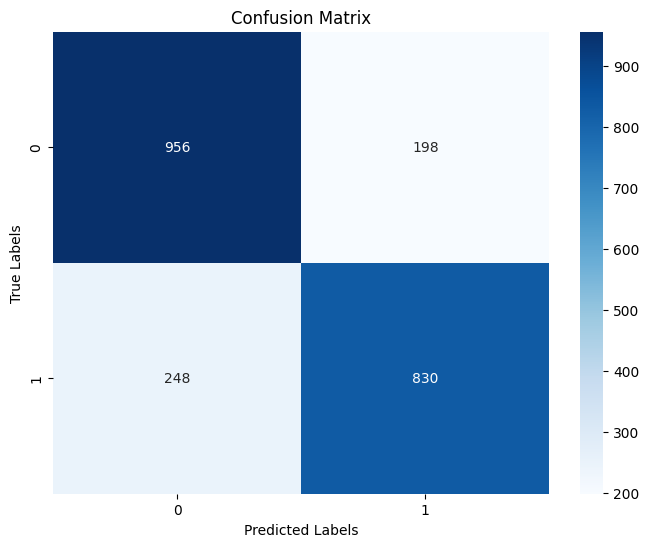

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()